# 0. Setting

In [22]:
# 상용 라이브러리
from glob import glob
import os
import pandas as pd
from datetime import datetime
import time
import numpy as np
import matplotlib as mat

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import plotly.express as px
import plotly.graph_objects as go

# 한글 폰트 패치
mat.rcParams['font.family']='Malgun Gothic'
mat.rcParams['axes.unicode_minus'] = False   

# 시각화 포맷 설정
plt.style.use("ggplot")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_context("talk")

# 경고문 처리
import warnings
warnings.filterwarnings('ignore')

In [23]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/Arial.ttf").get_name()
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/NANUMBARUNPENR.TTF").get_name()

def setPlotStyle():    
    # plt.figure(dpi=300)  
    mat.rcParams['font.family'] = font_name
    mat.rcParams['font.size'] = 15
    mat.rcParams['legend.fontsize'] = 15
    mat.rcParams['lines.linewidth'] = 2
    
setPlotStyle()

In [24]:
# BoxplotEDA Function Definition
def boxplotEDA(data,cols,nrow,ncol,title):
  df = data[cols]
  fig, ax = plt.subplots(nrow, ncol, figsize=(6*ncol,5*nrow))
  plt.suptitle(title,y=0.92,size=30)
  i=0
  for col in cols:
    sns.boxplot(y = df[col], ax=ax[i//ncol,i%ncol], palette='Set3', linewidth=1.5)
    i+=1  

# Sublineplot
def subplots(data,cols,nrow,ncol,title):
  df = data[cols]
  fig, ax = plt.subplots(nrow, ncol, figsize=(6*ncol,5*nrow))
  plt.suptitle(title, y=0.92, size=30)
  i=0
  for col in cols:
    ax[i//ncol,i%ncol].plot(df[col])
    ax[i//ncol,i%ncol].set_ylabel(col)
    i+=1  
  
# lineplot
def lineplot(data,cols,title):
  df = data[cols]
  plt.figure(figsize=(20,10))
  plt.title(title, y=1.05, size=25)
  for col in cols:
    plt.plot(df[col], label=col)
  plt.legend(loc='upper right')  

# corr_matrix
def corr_matrix(data, cols, title):
  df = data[cols]
  colormap = plt.cm.PuBu 
  plt.figure(figsize=(12, 12)) 
  plt.title(title, y=1.05, size=20)
  sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
              square = True, cmap = colormap, linecolor = "white", annot = True, fmt='.2f',
              annot_kws = {"size" : 12})
  plt.show()

# IQR Based Outlier Processing Function Definition
def outliers_iqr(data):
  q1,q3 = np.percentile(data,[25,75])
  iqr=q3-q1
  lower_bound=  q1 - (iqr *1.5)
  upper_bound = q3 + (iqr *1.5)
  data[data>upper_bound] = np.nan #np.mean(data)
  data[data<lower_bound] = np.nan #np.mean(data)
  data.interpolate(method="ffill", inplace=True)
  data.interpolate(method="bfill", inplace=True)
  return data

# 1. Before Preprocessing

In [25]:
df = pd.read_csv('data/device08_0713_0720.csv')
df = df[['TsYMD','Temperature','Humidity','TVOC','CO','CO2','CH2O','PM10']]
df['TsYMD'] = pd.to_datetime(df['TsYMD'])
df.index = df['TsYMD']
df.drop('TsYMD',inplace=True,axis=1)
print('df.shape :',df.shape)
df.head(2)

df.shape : (5379, 7)


,Temperature,Humidity,TVOC,CO,CO2,CH2O,PM10
TsYMD,,,,,,,
2022-07-13 00:01:06,22.63,36.52,2424.0,0.69,600.0,55.0,5.0
2022-07-13 00:03:06,22.64,36.55,2421.0,0.70,602.0,55.0,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5379 entries, 2022-07-13 00:01:06 to 2022-07-20 11:23:26
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  5379 non-null   float64
 1   Humidity     5379 non-null   float64
 2   TVOC         5379 non-null   float64
 3   CO           5379 non-null   float64
 4   CO2          5379 non-null   float64
 5   CH2O         5379 non-null   float64
 6   PM10         5379 non-null   float64
dtypes: float64(7)
memory usage: 336.2 KB


In [6]:
df.describe()

,Temperature,Humidity,TVOC,CO,CO2,CH2O,PM10
count,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000
mean,23.207211,37.955521,2076.963748,0.675869,560.110058,42.393196,17.889942
std,1.692350,3.994496,1521.763778,0.313186,120.446608,29.270025,13.468051
min,19.750000,26.900000,0.000000,0.000000,400.000000,0.000000,1.000000
25%,21.900000,35.955000,1110.500000,0.620000,480.000000,27.000000,6.000000
50%,23.050000,38.180000,1562.000000,0.740000,541.000000,37.000000,13.000000
75%,24.300000,40.620000,2887.500000,0.850000,641.000000,57.000000,28.000000
max,29.210000,46.520000,34954.000000,2.170000,2884.000000,1082.000000,82.000000


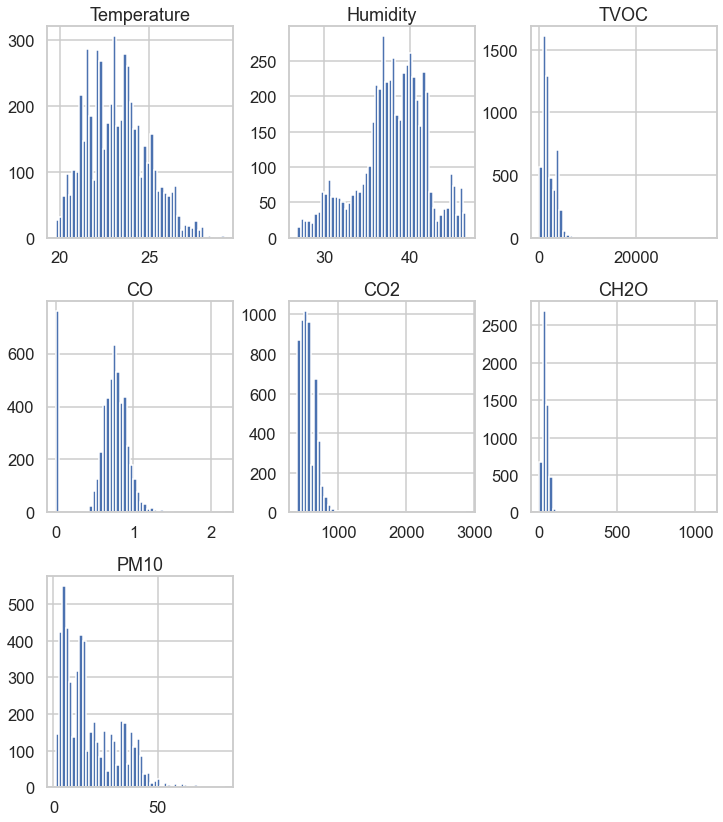

In [7]:
_ = df.hist(figsize=(12,14),bins=50)

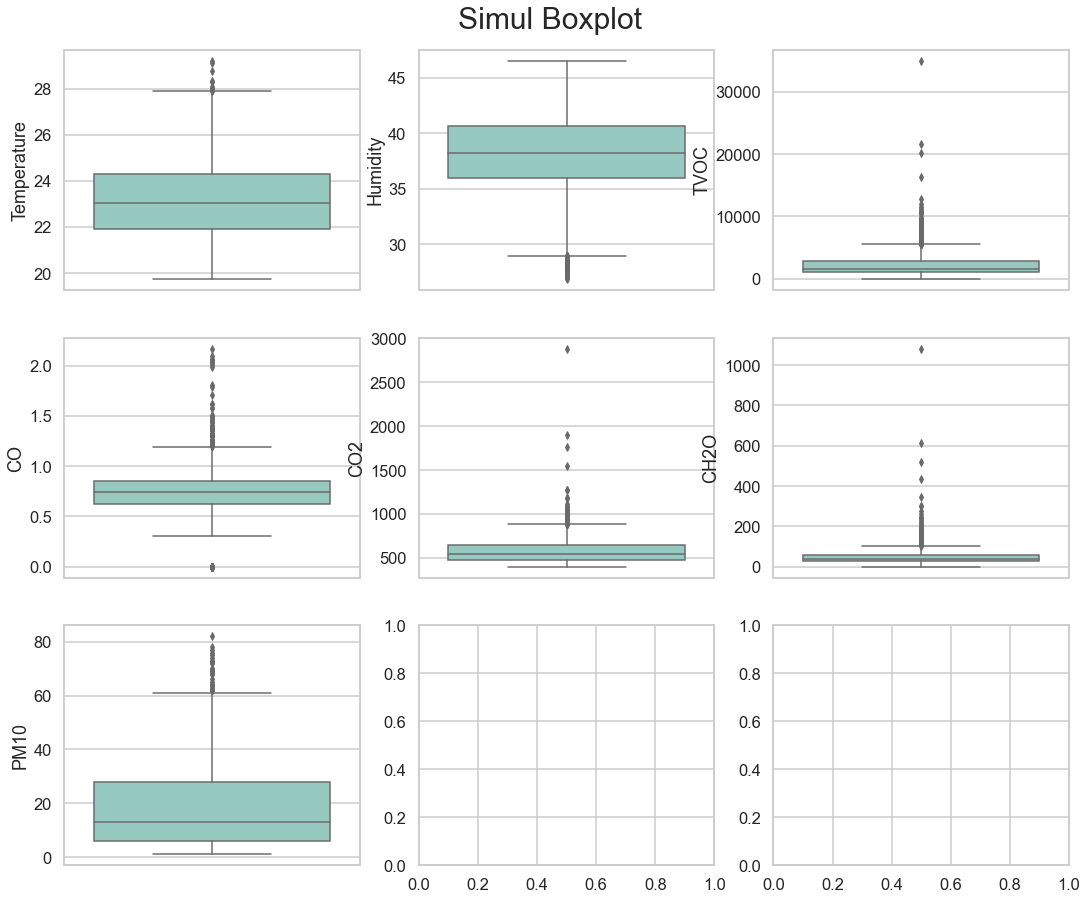

In [8]:
boxplotEDA(df,df.columns,3,3,'Simul Boxplot')

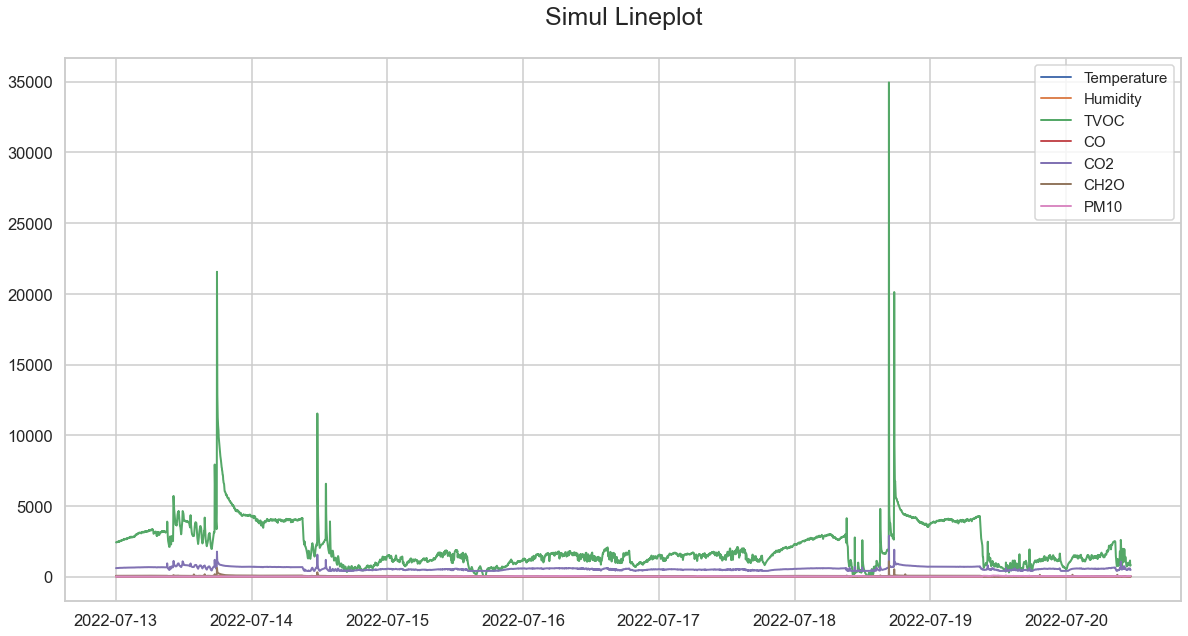

In [9]:
lineplot(df, df.columns,'Simul Lineplot')

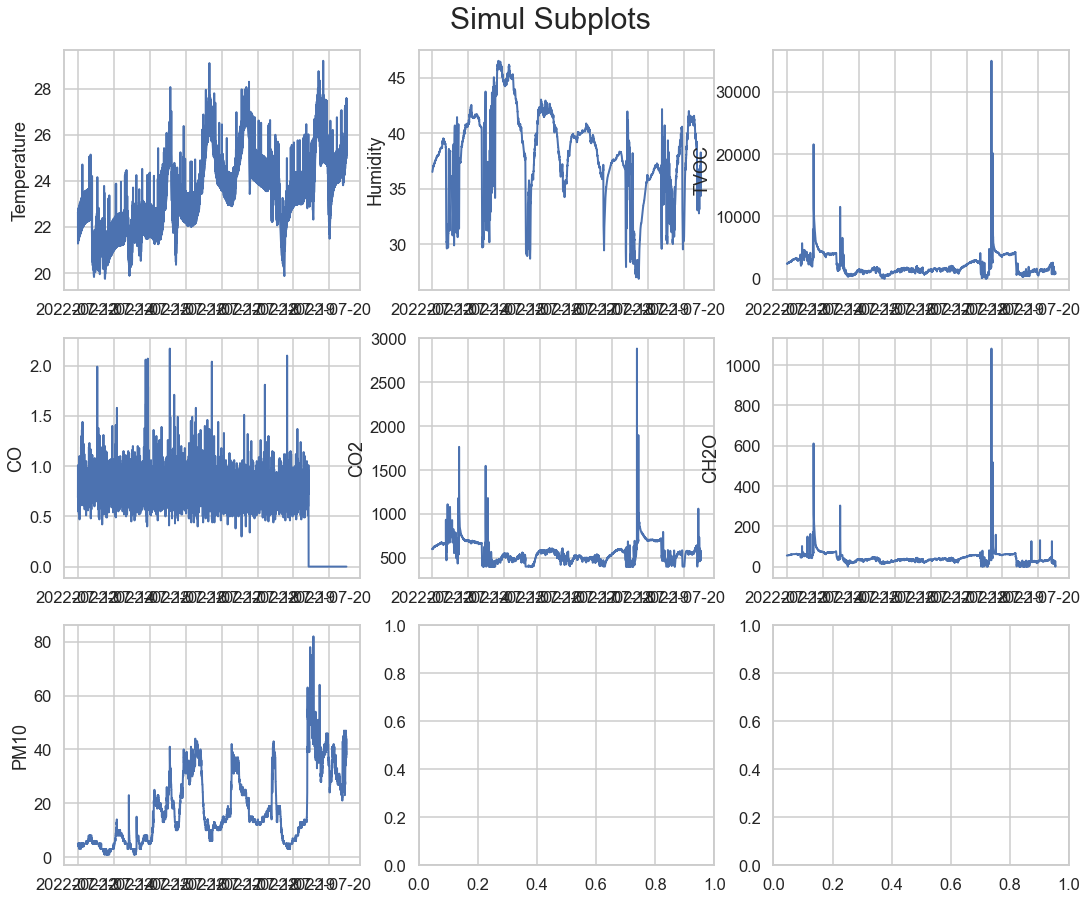

In [10]:
subplots(df,df.columns,3,3,'Simul Subplots')

# 2. After Preprocessing

In [26]:
# CO가 0인 측정 후반부는 모두 제거
df = df[df['CO'] > 0.2]
df = df.iloc[:4581,:]
df.index.name ='Time'
print('df.shape :',df.shape)
df.head()

df.shape : (4581, 7)


,Temperature,Humidity,TVOC,CO,CO2,CH2O,PM10
Time,,,,,,,
2022-07-13 00:01:06,22.63,36.52,2424.0,0.69,600.0,55.0,5.0
2022-07-13 00:03:06,22.64,36.55,2421.0,0.70,602.0,55.0,5.0
2022-07-13 00:05:06,21.28,36.58,2431.0,1.01,598.0,55.0,5.0
2022-07-13 00:07:06,21.29,36.63,2428.0,0.58,601.0,55.0,4.0
2022-07-13 00:09:06,21.31,36.65,2441.0,0.55,603.0,55.0,5.0


In [27]:
# Missing Value
print('Missing Value :',df.isna().sum().sum())

Missing Value : 0


In [13]:
# Outlier Processing
for col in df.columns:
    df[col] = outliers_iqr(df[col])

print('df.shape :',df.shape)
df.head()

df.shape : (4581, 7)


,Temperature,Humidity,TVOC,CO,CO2,CH2O,PM10
Time,,,,,,,
2022-07-13 00:01:06,22.63,36.52,2424.0,0.69,600.0,55.0,5.0
2022-07-13 00:03:06,22.64,36.55,2421.0,0.70,602.0,55.0,5.0
2022-07-13 00:05:06,21.28,36.58,2431.0,1.01,598.0,55.0,5.0
2022-07-13 00:07:06,21.29,36.63,2428.0,0.58,601.0,55.0,4.0
2022-07-13 00:09:06,21.31,36.65,2441.0,0.55,603.0,55.0,5.0


In [14]:
df.tail()

,Temperature,Humidity,TVOC,CO,CO2,CH2O,PM10
Time,,,,,,,
2022-07-19 08:38:29,23.72,36.34,4251.0,0.80,713.0,66.0,13.0
2022-07-19 08:40:30,23.73,36.32,4243.0,0.60,713.0,65.0,14.0
2022-07-19 08:42:29,23.74,36.48,4283.0,0.66,718.0,66.0,13.0
2022-07-19 08:44:29,23.74,37.11,4268.0,0.73,724.0,66.0,13.0
2022-07-19 08:46:29,23.75,35.96,4027.0,0.75,700.0,57.0,13.0


In [17]:
df.describe()

,Temperature,Humidity,TVOC,CO,CO2,CH2O,PM10
count,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000
mean,22.953661,38.245460,2177.552718,0.775204,565.945427,43.723859,14.279852
std,1.609759,3.917308,1308.848688,0.135394,113.363367,17.407884,10.303402
min,19.750000,29.570000,0.000000,0.400000,400.000000,0.000000,1.000000
25%,21.660000,36.260000,1183.000000,0.680000,484.000000,31.000000,6.000000
50%,22.860000,38.340000,1657.000000,0.770000,545.000000,39.000000,12.000000
75%,23.930000,40.720000,3174.000000,0.870000,665.000000,59.000000,20.000000
max,27.320000,46.520000,6159.000000,1.150000,934.000000,101.000000,41.000000


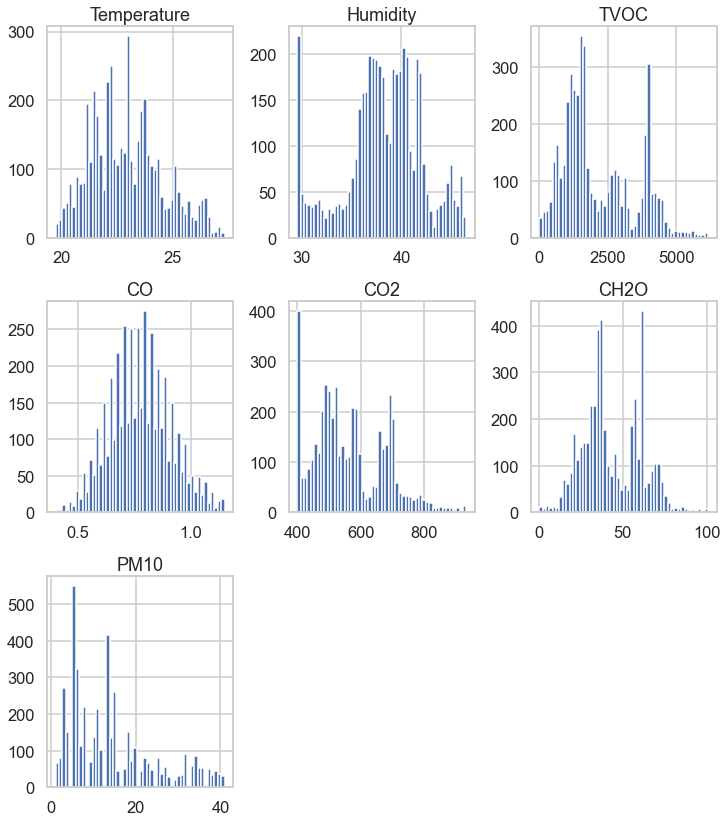

In [18]:
_ = df.hist(figsize=(12,14),bins=50)

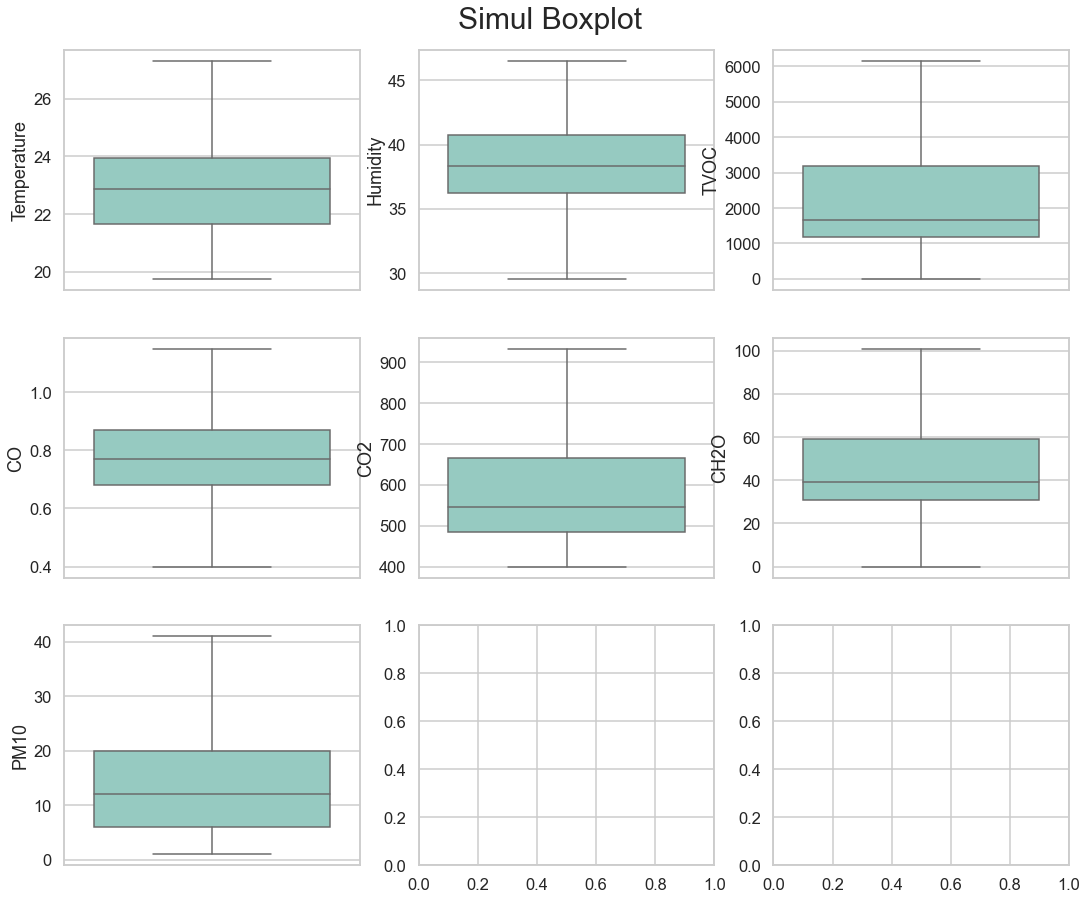

In [19]:
boxplotEDA(df,df.columns,3,3,'Simul Boxplot')

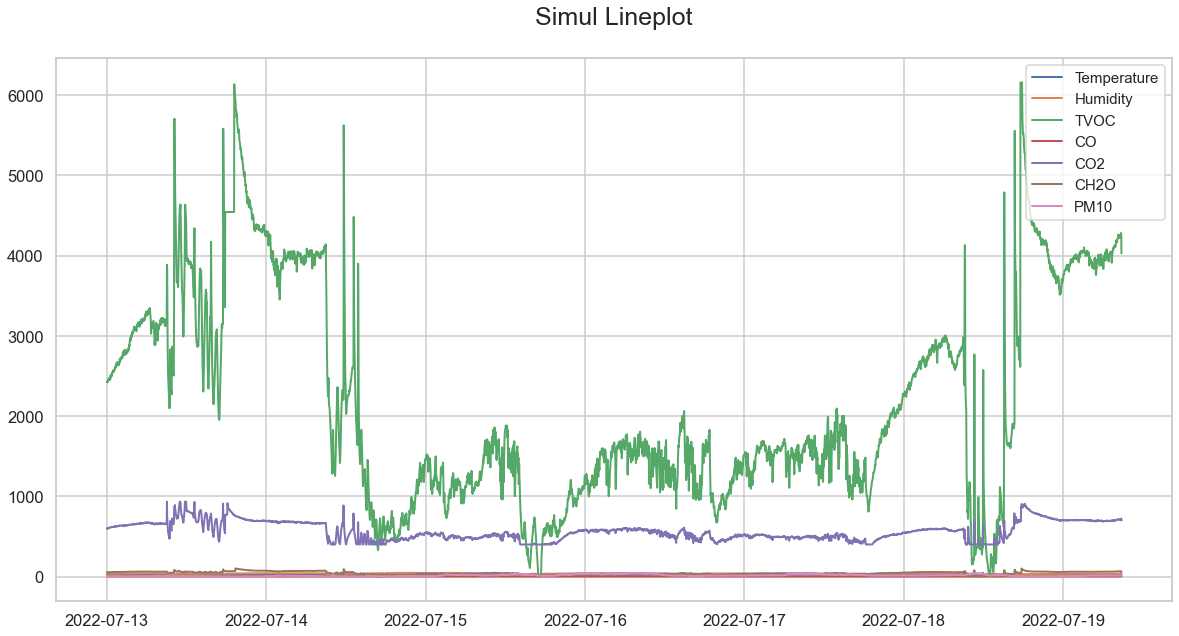

In [20]:
lineplot(df,df.columns,'Simul Lineplot')

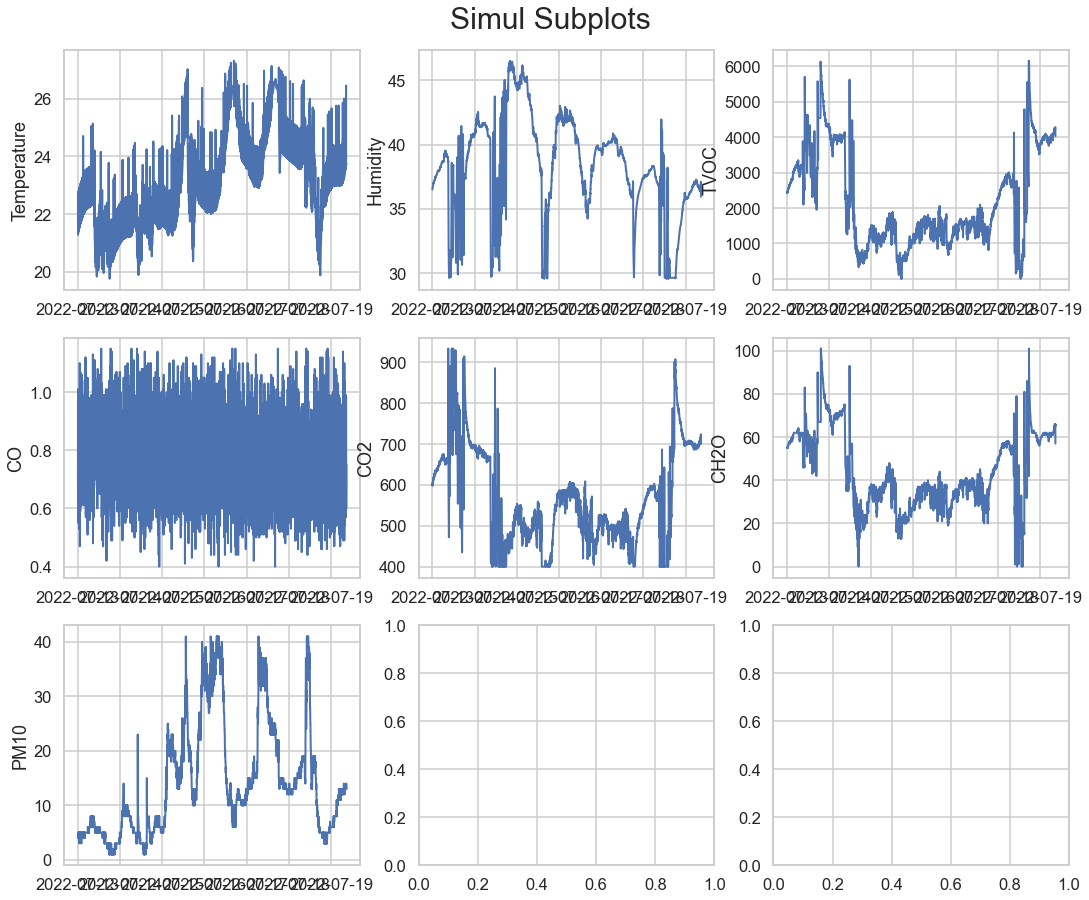

In [21]:
subplots(df,df.columns,3,3,'Simul Subplots')

### Export CSV

In [28]:
# file_path = 'data/simul_raw.csv'
# df.to_csv(file_path)

In [30]:
# pd.read_csv(file_path).head()

,Time,Temperature,Humidity,TVOC,CO,CO2,CH2O,PM10
0,2022-07-13 00:01:06,22.63,36.52,2424.0,0.69,600.0,55.0,5.0
1,2022-07-13 00:03:06,22.64,36.55,2421.0,0.70,602.0,55.0,5.0
2,2022-07-13 00:05:06,21.28,36.58,2431.0,1.01,598.0,55.0,5.0
3,2022-07-13 00:07:06,21.29,36.63,2428.0,0.58,601.0,55.0,4.0
4,2022-07-13 00:09:06,21.31,36.65,2441.0,0.55,603.0,55.0,5.0
